<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">Periodismo de datos</p>
<p style="margin: 0; text-align:right;">Máster universitario en Ciencias de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicaciones</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>


# Periodismo de datos: Análisis y visualización de los datos

En este script de python se pretende:

1. **Preparar los datos para ser analizados**
2. **Analizar los datos**

Esto se hará con dos datasets:
1. **Menores condenados en España anuales según el sexo, la edad y la nacionalidad de los años 2018 a 2013**
2. **Población residente por fecha, sexo, grupo de edad y nacionalidad**


In [102]:
#IMPORTS. 

import pandas as pd
import matplotlib.pyplot as plt

## 1. Carga y preparación de los datos de menores condenados 

Procedemos a cargar el fichero excel 25721.xls, que contiene los menores condenados anuales en España según el sexo, la edad y la nacionalidad de los años 2018 a 2013, tratando las comas como decimales. Los datos se han extraido del instituto nacional de estadistica, en el siguiente link: https://www.ine.es/jaxiT3/Tabla.htm?t=25721&L=0

In [103]:
data = pd.read_excel('./data_sources/25721.xls',usecols=range(0,7),decimal=",")

In [104]:
df_Total=data.iloc[:54]
df_hombres=data.iloc[56:104]
df_mujeres=data.iloc[105:153]

Procedemos a crear el dataframe de hombres:

In [105]:
list_nationality=[]
list_indexes_to_remove=[]
for i in range(0,df_hombres.shape[0],6):
    list_indexes_to_remove.append(i)
    for j in range(0,6):
        list_nationality.append(df_hombres.iloc[i,0])
df_hombres=df_hombres.assign(Nationality = list_nationality)
df_hombres.index=range(48)
df_hombres=df_hombres.drop(list_indexes_to_remove)
df_hombres=df_hombres.replace(to_replace ="                14 años", 
                 value =14) 
df_hombres=df_hombres.replace(to_replace ="                15 años", 
                 value =15) 
df_hombres=df_hombres.replace(to_replace ="                16 años", 
                 value =16) 
df_hombres=df_hombres.replace(to_replace ="                17 años", 
                 value =17) 
df_hombres.index=range(40)
df_hombres.columns=['Age','2018','2017','2016','2015','2014','2013','Nationality']
list_sex=[]
for j in range(0,40):
    list_sex.append('hombre')
df_hombres=df_hombres.assign(sex = list_sex)
df_hombres.head(10)

,Age,2018,2017,2016,2015,2014,2013,Nationality,sex
0,Total,10753.0,10819.0,10346.0,11141.0,12147.0,11988.0,Total,hombre
1,14,1899.0,1816.0,1712.0,1878.0,1944.0,1853.0,Total,hombre
2,15,2351.0,2457.0,2444.0,2494.0,2706.0,2627.0,Total,hombre
3,16,3119.0,3125.0,2935.0,3143.0,3423.0,3462.0,Total,hombre
4,17,3384.0,3421.0,3255.0,3626.0,4074.0,4046.0,Total,hombre
5,Total,8567.0,8508.0,8100.0,8658.0,9315.0,8902.0,Española,hombre
6,14,1612.0,1494.0,1398.0,1560.0,1566.0,1430.0,Española,hombre
7,15,1898.0,2000.0,1950.0,1978.0,2089.0,1974.0,Española,hombre
8,16,2456.0,2400.0,2296.0,2352.0,2575.0,2537.0,Española,hombre
9,17,2601.0,2614.0,2456.0,2768.0,3085.0,2961.0,Española,hombre


Procedemos a crear el dataframe de mujeres:

In [106]:
list_nationality=[]
list_indexes_to_remove=[]
for i in range(0,df_mujeres.shape[0],6):
    list_indexes_to_remove.append(i)
    for j in range(0,6):
        list_nationality.append(df_mujeres.iloc[i,0])
df_mujeres
df_mujeres=df_mujeres.assign(Nationality = list_nationality)
df_mujeres.index=range(48)
df_mujeres=df_mujeres.drop(list_indexes_to_remove)
df_mujeres=df_mujeres.replace(to_replace ="                14 años", 
                 value =14) 
df_mujeres=df_mujeres.replace(to_replace ="                15 años", 
                 value =15) 
df_mujeres=df_mujeres.replace(to_replace ="                16 años", 
                 value =16) 
df_mujeres=df_mujeres.replace(to_replace ="                17 años", 
                 value =17) 
df_mujeres.index=range(40)
df_mujeres.columns=['Age','2018','2017','2016','2015','2014','2013','Nationality']
list_sex=[]
for j in range(0,40):
    list_sex.append('mujer')
df_mujeres=df_mujeres.assign(sex = list_sex)
df_mujeres.head(10)

,Age,2018,2017,2016,2015,2014,2013,Nationality,sex
0,Total,2911.0,2824.0,2582.0,2840.0,2901.0,2756.0,Total,mujer
1,14,681.0,607.0,550.0,562.0,614.0,550.0,Total,mujer
2,15,729.0,760.0,675.0,712.0,710.0,696.0,Total,mujer
3,16,794.0,786.0,705.0,786.0,800.0,757.0,Total,mujer
4,17,707.0,671.0,652.0,780.0,777.0,753.0,Total,mujer
5,Total,2595.0,2485.0,2240.0,2470.0,2449.0,2310.0,Española,mujer
6,14,620.0,538.0,496.0,496.0,526.0,456.0,Española,mujer
7,15,640.0,677.0,583.0,637.0,611.0,590.0,Española,mujer
8,16,705.0,683.0,617.0,683.0,672.0,642.0,Española,mujer
9,17,630.0,587.0,544.0,654.0,640.0,622.0,Española,mujer


Procedemos a crear el dataframe final (uniendo hombres y mujeres):

In [107]:
dataset=pd.concat([df_mujeres,df_hombres])
dataset=dataset[dataset['Age'] != "                Total"]
dataset=dataset[dataset['Nationality'] != "    Total"]
dataset.index=range(56)
dataset=dataset.melt(id_vars=['Age','Nationality','sex'], var_name='Year', value_name='Menores_condenados')
dataset

,Age,Nationality,sex,Year,Menores_condenados
0,14,Española,mujer,2018,620.0
1,15,Española,mujer,2018,640.0
2,16,Española,mujer,2018,705.0
3,17,Española,mujer,2018,630.0
4,14,País de la Unión Europea sin España,mujer,2018,24.0
5,15,País de la Unión Europea sin España,mujer,2018,37.0
6,16,País de la Unión Europea sin España,mujer,2018,34.0
7,17,País de la Unión Europea sin España,mujer,2018,21.0
8,14,País del resto de Europa,mujer,2018,1.0
9,15,País del resto de Europa,mujer,2018,1.0


Guardamos el dataframe final en un excel llamado output_condenas_menores.xlsx:

In [108]:
dataset.to_excel("./generated_output/output_condenas_menores.xlsx")

## 2. Analisis de los datos de menores condenados

Procedemos a analizar los datos de los menores condenados. 

In [109]:
print(dataset.groupby('Year').sum())
print("")
print(dataset.groupby('Nationality').sum())
print("")
print(dataset.groupby('sex').sum())
print("")
print(dataset.groupby('Age').sum())

      Menores_condenados
Year                    
2013             14744.0
2014             15048.0
2015             13981.0
2016             12928.0
2017             13643.0
2018             13664.0

                                         Menores_condenados
Nationality                                                
    De América                                       5105.0
    De Asia                                           205.0
    De Oceanía                                          6.0
    Española                                        66599.0
    País de Africa                                   7538.0
    País de la Unión Europea sin España              4081.0
    País del resto de Europa                          474.0

        Menores_condenados
sex                       
hombre             67194.0
mujer              16814.0

     Menores_condenados
Age                    
14              14666.0
15              19361.0
16              23835.0
17              26146.0


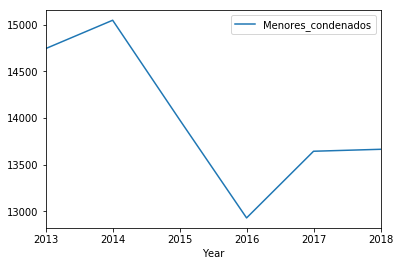

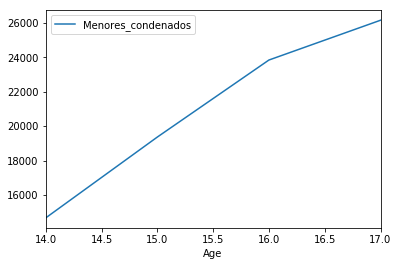

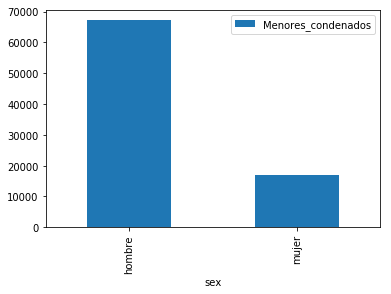

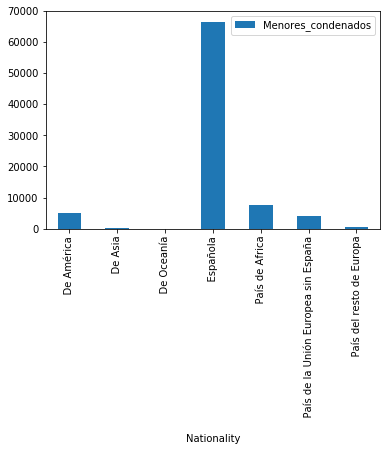

In [110]:
dataset.groupby('Year').sum().plot(kind='line')
plt.show()

dataset.groupby('Age').sum().plot(kind='line') 
plt.show()

dataset.groupby('sex').sum().plot(kind='bar') 
plt.show()

dataset.groupby('Nationality').sum().plot(kind='bar')
plt.show()


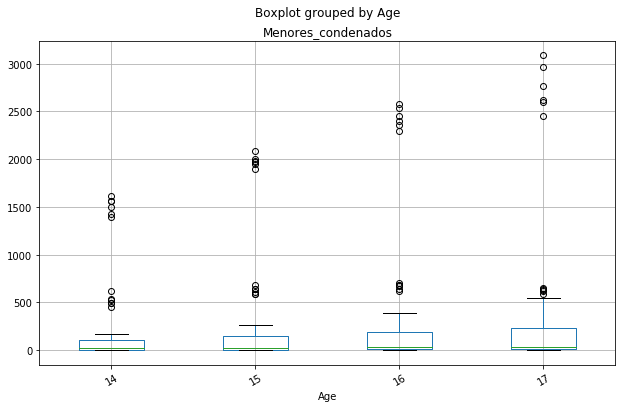

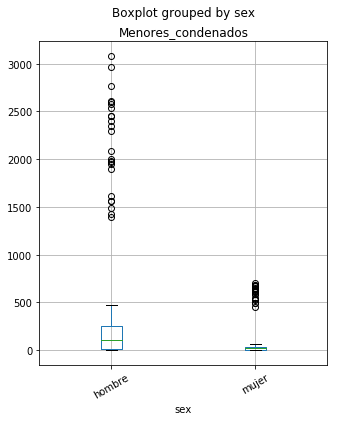

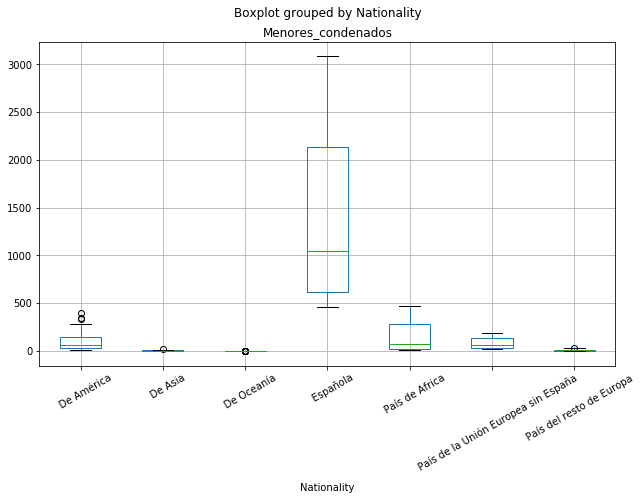

In [111]:
dataset.boxplot('Menores_condenados','Age',rot = 30,figsize=(10,6))
dataset.boxplot('Menores_condenados','sex',rot = 30,figsize=(5,6))
dataset.boxplot('Menores_condenados','Nationality',rot = 30,figsize=(10,6))


## 3. Carga y preparación de los datos de la población en España 

Procedemos a cargar el fichero excel 9674.xls, que contiene la población residente en España por fecha, sexo, grupo de edad y nacionalidad, tratando las comas como decimales. Los datos se han extraido del instituto nacional de estadistica, en el siguiente link: https://www.ine.es/jaxiT3/Tabla.htm?t=9674&L=0

In [112]:
dataset2 = pd.read_excel('./data_sources/9674.xls',decimal=",")

Filtraremos para tener únicamente aquellos datos relativos a la nacionalidad española, la nacionalidad africana, la población total y solo menores de 19 años. 

In [113]:
df_Total=dataset2.iloc[6:27]
df_española=dataset2.iloc[87:108]
df_africa=dataset2.iloc[2112:2133]

In [114]:
list_nation=[]
for j in range(0,21):
    list_nation.append('total')
df_Total=df_Total.assign(nationality = list_nation)
df_Total=df_Total[df_Total['Series detalladas desde 2002'] != "            Ambos sexos"]
list_ages=[]
list_indexes_to_remove=[]
for i in range(1,df_Total.shape[0],3):
    list_indexes_to_remove.append(i)
    for j in range(0,2):
        list_ages.append(df_Total.iloc[i,0])
df_Total=df_Total.dropna()
df_Total.index=range(10)
df_Total=df_Total.assign(Age = list_ages)
df_Total=df_Total.drop([0,1])
df_Total.index=range(8)
for i in range(15,36,1):
    df_Total=df_Total.drop(df_Total.columns[15], axis=1)
df_Total.columns=['sex','01/01/2019','01/07/2019','01/01/2018','01/07/2018','01/01/2017','01/07/2017',
                   '01/01/2016','01/07/2016','01/01/2015','01/07/2015','01/01/2014','01/07/2014',
                   '01/01/2013','01/07/2013','nationality','Age']
df_Total

,sex,01/01/2019,01/07/2019,01/01/2018,01/07/2018,01/01/2017,01/07/2017,01/01/2016,01/07/2016,01/01/2015,01/07/2015,01/01/2014,01/07/2014,01/01/2013,01/07/2013,nationality,Age
0,Hombres,1062369,1071293,1084400,1092460,1107529,1118274,1135064,1146115,1163218,1176758,1196688,1220340,1250262,1263240,total,De 0 a 4 años
1,Mujeres,1001442,1009649,1021827,1029341,1043113,1052309,1067698,1077504,1093474,1105596,1123924,1145272,1172504,1184301,total,De 0 a 4 años
2,Hombres,1215361,1231588,1250866,1258471,1269088,1272933,1278835,1279616,1281689,1279295,1277953,1266861,1256481,1245233,total,De 5 a 9 años
3,Mujeres,1141380,1155943,1173108,1179948,1189535,1192904,1198369,1199964,1202687,1201279,1200545,1191965,1184050,1174409,total,De 5 a 9 años
4,Hombres,1292310,1275262,1261153,1246033,1233379,1218495,1205603,1195593,1187484,1176061,1165624,1155180,1146097,1139621,total,De 10 a 14 años
5,Mujeres,1213319,1198982,1187212,1173722,1162537,1150273,1139833,1129541,1120525,1110773,1102219,1090978,1080605,1075198,total,De 10 a 14 años
6,Hombres,1202738,1183135,1167453,1154658,1145115,1134343,1125439,1115880,1107969,1104523,1102242,1107764,1114479,1123375,total,De 15 a 19 años
7,Mujeres,1129357,1111539,1096394,1085896,1077898,1068219,1060191,1052181,1045326,1041308,1038329,1044238,1051130,1059516,total,De 15 a 19 años


In [115]:
list_nation=[]
for j in range(0,21):
    list_nation.append('española')
df_española=df_española.assign(nationality = list_nation)
df_española=df_española[df_española['Series detalladas desde 2002'] != "            Ambos sexos"]
list_ages=[]
list_indexes_to_remove=[]
for i in range(1,df_española.shape[0],3):
    list_indexes_to_remove.append(i)
    for j in range(0,2):
        list_ages.append(df_española.iloc[i,0])
df_española=df_española.dropna()
df_española.index=range(10)
df_española=df_española.assign(Age = list_ages)
df_española=df_española.drop([0,1])
df_española.index=range(8)
for i in range(15,36,1):
    df_española=df_española.drop(df_española.columns[15], axis=1)
df_española.columns=['sex','01/01/2019','01/07/2019','01/01/2018','01/07/2018','01/01/2017','01/07/2017',
                   '01/01/2016','01/07/2016','01/01/2015','01/07/2015','01/01/2014','01/07/2014',
                   '01/01/2013','01/07/2013','nationality','Age']
df_española

,sex,01/01/2019,01/07/2019,01/01/2018,01/07/2018,01/01/2017,01/07/2017,01/01/2016,01/07/2016,01/01/2015,01/07/2015,01/01/2014,01/07/2014,01/01/2013,01/07/2013,nationality,Age
0,Hombres,914171,930340,948563,961439,977790,991222,1007245,1019118,1033854,1044815,1058815,1077354,1101200,1114998,española,De 0 a 4 años
1,Mujeres,862093,876985,893836,906116,921326,933338,948277,959045,972934,982759,995888,1013130,1035197,1047810,española,De 0 a 4 años
2,Hombres,1092931,1113528,1134888,1147170,1159110,1163367,1167607,1169083,1170629,1168677,1165654,1154227,1143953,1133443,española,De 5 a 9 años
3,Mujeres,1026903,1045704,1065219,1076931,1088278,1092234,1096059,1098521,1100697,1099382,1097208,1088113,1079964,1070846,española,De 5 a 9 años
4,Hombres,1182874,1171225,1160183,1148296,1136344,1122993,1110055,1099963,1089256,1074946,1059320,1044311,1029687,1020068,española,De 10 a 14 años
5,Mujeres,1112719,1103600,1094921,1084523,1074032,1062677,1051496,1040941,1029721,1017181,1003333,987734,972231,963669,española,De 10 a 14 años
6,Hombres,1086622,1073169,1060055,1050413,1040348,1029350,1018062,1007243,996128,989383,981033,981187,981699,988234,española,De 15 a 19 años
7,Mujeres,1027872,1013630,999630,991112,982299,972404,962258,952777,943073,936236,928350,929131,930309,936523,española,De 15 a 19 años


In [116]:
list_nation=[]
for j in range(0,21):
    list_nation.append('africana')
df_africa=df_africa.assign(nationality = list_nation)
df_africa=df_africa[df_africa['Series detalladas desde 2002'] != "            Ambos sexos"]
list_ages=[]
list_indexes_to_remove=[]
for i in range(1,df_africa.shape[0],3):
    list_indexes_to_remove.append(i)
    for j in range(0,2):
        list_ages.append(df_africa.iloc[i,0])
df_africa=df_africa.dropna()
df_africa.index=range(10)
df_africa=df_africa.assign(Age = list_ages)
df_africa=df_africa.drop([0,1])
df_africa.index=range(8)
for i in range(15,36,1):
    df_africa=df_africa.drop(df_africa.columns[15], axis=1)
df_africa.columns=['sex','01/01/2019','01/07/2019','01/01/2018','01/07/2018','01/01/2017','01/07/2017',
                   '01/01/2016','01/07/2016','01/01/2015','01/07/2015','01/01/2014','01/07/2014',
                   '01/01/2013','01/07/2013','nationality','Age']

df_africa

,sex,01/01/2019,01/07/2019,01/01/2018,01/07/2018,01/01/2017,01/07/2017,01/01/2016,01/07/2016,01/01/2015,01/07/2015,01/01/2014,01/07/2014,01/01/2013,01/07/2013,nationality,Age
0,Hombres,54352,52884,52129,51255,51740,51654,53418,54084,56265,58299,61361,64322,67548,67175,africana,De 0 a 4 años
1,Mujeres,50773,49485,48992,47829,48108,48046,49494,49839,51687,53648,56410,58688,61320,61098,africana,De 0 a 4 años
2,Hombres,41738,42372,43292,42834,43397,44473,46203,45751,45501,44910,44854,43846,42023,39901,africana,De 5 a 9 años
3,Mujeres,38214,38702,39268,38829,39231,40031,41731,41225,40971,40548,40507,39608,38131,36115,africana,De 5 a 9 años
4,Hombres,36303,34787,33558,32461,31683,30698,29841,28926,28287,27779,27454,27325,27056,26713,africana,De 10 a 14 años
5,Mujeres,32007,30837,29847,28898,28240,27449,26807,25930,25303,24717,24287,23980,23679,23234,africana,De 10 a 14 años
6,Hombres,34689,31511,29655,28071,27381,27030,27114,27000,27242,27549,28204,28781,29510,29881,africana,De 15 a 19 años
7,Mujeres,24176,23242,22541,21918,21609,21367,21513,21492,21574,21753,22006,22322,22506,22412,africana,De 15 a 19 años


Procedemos a crear el dataframe final, uniendo los resultados de nacionalidad española, africana y la población total:

In [117]:
dataset_final=pd.concat([df_española,df_africa,df_Total])

dataset_final.index=range(24)
dataset_final=dataset_final.melt(id_vars=['sex','nationality','Age'], var_name='Date', value_name='poblacion')
dataset_final

,sex,nationality,Age,Date,poblacion
0,Hombres,española,De 0 a 4 años,01/01/2019,914171
1,Mujeres,española,De 0 a 4 años,01/01/2019,862093
2,Hombres,española,De 5 a 9 años,01/01/2019,1092931
3,Mujeres,española,De 5 a 9 años,01/01/2019,1026903
4,Hombres,española,De 10 a 14 años,01/01/2019,1182874
5,Mujeres,española,De 10 a 14 años,01/01/2019,1112719
6,Hombres,española,De 15 a 19 años,01/01/2019,1086622
7,Mujeres,española,De 15 a 19 años,01/01/2019,1027872
8,Hombres,africana,De 0 a 4 años,01/01/2019,54352
9,Mujeres,africana,De 0 a 4 años,01/01/2019,50773


Guardamos el dataframe final en un excel llamado output_poblacion.xlsx:

In [118]:
dataset_final.to_excel("./generated_output/output_poblacion.xlsx")

## 4. Analisis de los datos de la población

Procedemos a analizar los datos de la nacionalidad de la población en España. 

In [119]:

print("")
print(dataset_final.groupby(['nationality','poblacion']).sum())
print("")
print(dataset_final.groupby('sex').sum())
print("")
print(dataset_final.groupby('Age').sum())


                                       sex                        Age  \
nationality poblacion                                                   
africana    21367                  Mujeres          De 15 a 19 años     
            21492                  Mujeres          De 15 a 19 años     
            21513                  Mujeres          De 15 a 19 años     
            21574                  Mujeres          De 15 a 19 años     
            21609                  Mujeres          De 15 a 19 años     
            21753                  Mujeres          De 15 a 19 años     
            21918                  Mujeres          De 15 a 19 años     
            22006                  Mujeres          De 15 a 19 años     
            22322                  Mujeres          De 15 a 19 años     
            22412                  Mujeres          De 15 a 19 años     
            22506                  Mujeres          De 15 a 19 años     
            22541                  Mujeres        

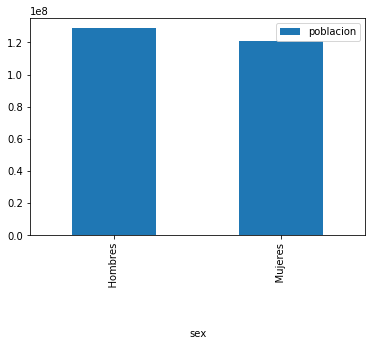

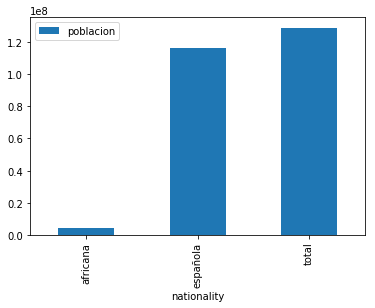

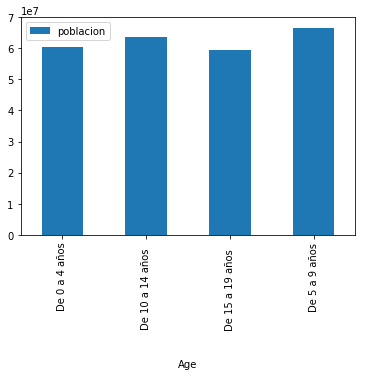

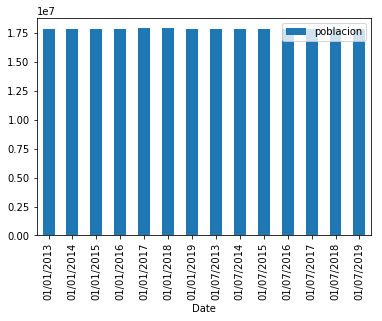

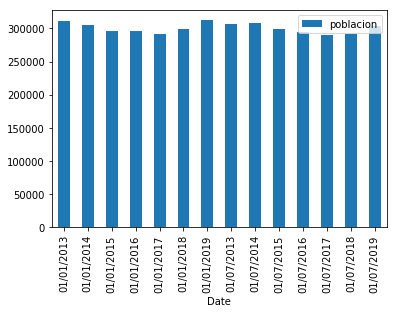

In [120]:
dataset_final.groupby('sex').sum().plot(kind='bar') 
plt.show()

dataset_final.groupby('nationality').sum().plot(kind='bar')
plt.show()

dataset_final.groupby('Age').sum().plot(kind='bar') 
plt.show()

dataset_final.groupby('Date').sum().plot(kind='bar') 
plt.show()

dataset_final[dataset_final['nationality']=='africana'].groupby('Date').sum().plot(kind='bar') 
plt.show()

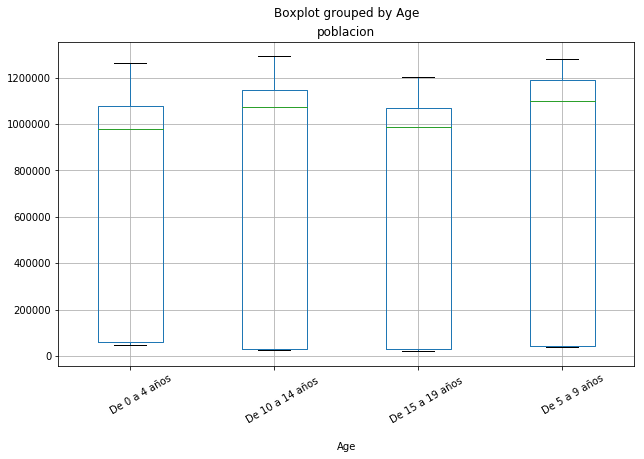

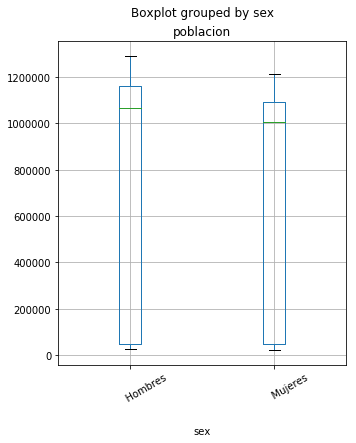

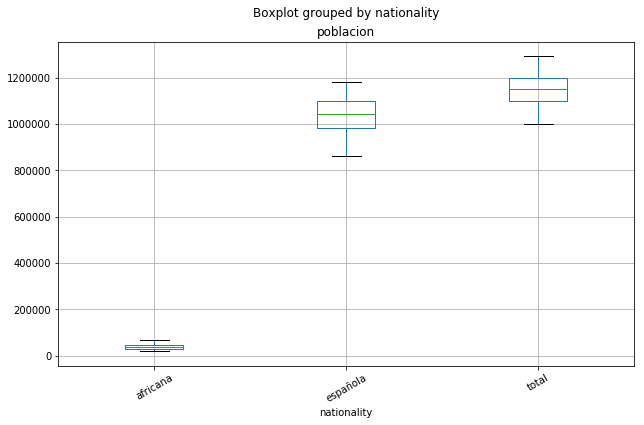

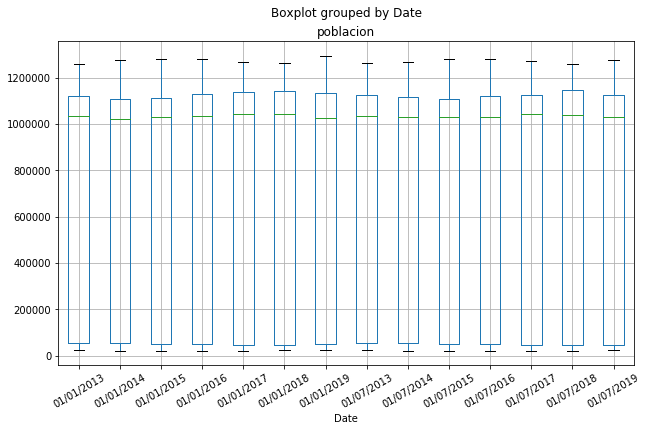

In [121]:
dataset_final.boxplot('poblacion','Age',rot = 30,figsize=(10,6))
dataset_final.boxplot('poblacion','sex',rot = 30,figsize=(5,6))
dataset_final.boxplot('poblacion','nationality',rot = 30,figsize=(10,6))
dataset_final.boxplot('poblacion','Date',rot = 30,figsize=(10,6))
